In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import random, scipy
from ifitpy import Fitter
from ifitpy import Functions
from ifitpy import Utils

In [2]:
f = Fitter("linear") #linear, expo, gaussian, gaussian2d, poly

# This fit package permits to, well, fit a given x,y data. It encapsulates both iminuit and curve_fit. 
# There are two type of functions. Simple (linear, expo) and Complex(gaussian, gaussian2d, poly).

# For Simple function fit(x,y) are fit(x,y,p0) are valid inputs. 
# In the first option the fit attempts to estimate the initial starting point 
# In the second option a list of parameters (p0) is used to innitilized the fit

# For Complex functions fit(x,y, n) are fit(x,y,p0) are valid inputs. 
# If n us used then the algorithm will use this value to generate the fitting function with n components
# For example, fit(xx,yy,n=3) will fit a sum of two gaussian(2d) or a 3-degree polinom. And p0 zero is also estimated.
# If fit(x,y,n,p0) p0 will be the innitialization parameters. Note that len(p0) = n*parameters_to_fit.

#There's also a f.fitBinned(xx,yy,bins=50) option which allows to fit a profile histogram instead of the raw data.
#This option is often faster and the recomended one as it takes into account the statistical fluctuation of the data.

#To extract the fit results use

f.fit([0,10], [0,-10])
p = f.getParams()
print(p) # prints a string with the available variables.
print(p.vars) # list of the results
print(p.m) # slope for the "linear" type
print(p.b) # slope for the "intercept" type

#Use f.evaluate(xx) to evaluate the function, like for plotting and such
print(f.evaluate([20]))


vars: [-1.0, 0.0], m: -1.0, b: 0.0
[-1.0, 0.0]
-1.0
0.0
[-20.]


/home/guilherme/.local/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


<IPython.core.display.Javascript object>


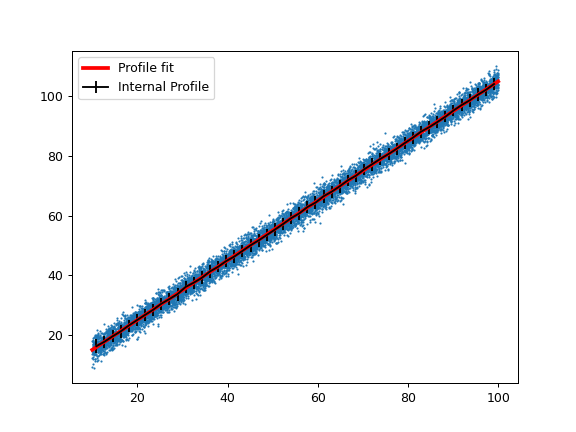


0.9999247221397226 5.010851781641539
Chi2 =  0.0

1.000096980016059 4.999921425935179
Chi2 =  0.0


In [3]:
m, b = 1,0
xx = np.arange(10,100,0.01)
yy = xx*m+b + np.random.normal(5, 2, size = xx.shape)


fig = plt.figure()
plt.scatter(xx, yy,s=0.5)

f = Fitter("linear")
f.fit(xx,yy)
p = f.getParams()
print(p.m,p.b)
print("Chi2 = ",f.chi2/f.dof)

plt.plot(xx, xx*p.m+p.b, c="orange")


f = Fitter("linear")
f.fitBinned(xx,yy,bins=50)
p = f.getParams()
print(p.m,p.b)
print("Chi2 = ",f.chi2/f.dof)

plt.errorbar(f.profx, f.profy, yerr=f.profyrr, c="black", label="Internal Profile")
plt.plot(xx,f.evaluate(xx), c="red", label="Profile fit", lw=3)
plt.legend()

<IPython.core.display.Javascript object>


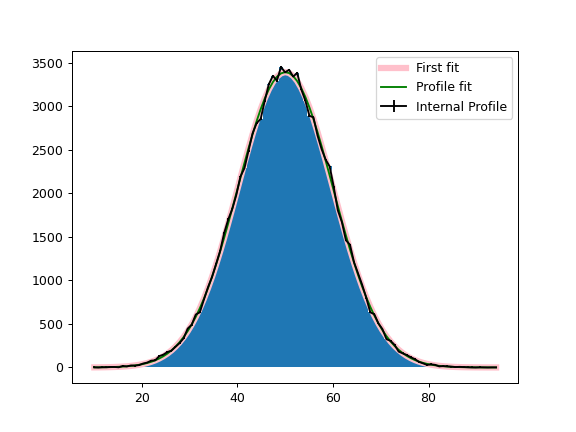

potencial_means:  [12.61032885 49.21600259 50.70456901 92.37293593]
yy_roots_values:  [3.60087681e+00 3.37967034e+03 3.39615761e+03 1.00168213e+00]
Chi2 =  0.0
[3390.9020819100847, 50.024491157262005, 9.987186499597172]
potencial_means:  [12.61032885 49.21600259 50.70456901 92.37293593]
yy_roots_values:  [3.60087681e+00 3.37967034e+03 3.39615761e+03 1.00168213e+00]
2: Chi2 =  0.0
vars: [3390.01813333317, 50.02186502490384, 9.988312418948178], amp: 3390.01813333317, mean: 50.02186502490384, sigma: 9.988312418948178
Mean is:  50.02186502490384
Sigma is:  9.988312418948178
Amplitude is:  3390.01813333317
[3390.01813333317, 50.02186502490384, 9.988312418948178]


In [170]:
mu, sig = 50,10
yyt = np.random.normal(mu, sig, size = 100000)

fig = plt.figure()
res = plt.hist(yyt, bins=100)

yy = res[0]
xx = (res[1][:-1]+res[1][1:])*0.5

f = Fitter("gaussian")
f.fit(xx, yy)
plt.plot(xx,f.evaluate(xx), c="pink", label="First fit", lw=5)

p = f.getParams()
print("Chi2 = ",f.chi2/f.dof)
print(p.vars)


f = Fitter("gaussian")
f.fitBinned(yyt,bins=100)
p = f.getParams()
print("2: Chi2 = ",f.chi2/f.dof)
print(p)
print("Mean is: ", p.mean)
print("Sigma is: ", p.sigma)
print("Amplitude is: ", p.amp)
print(p.vars)

plt.errorbar(f.profx, f.profy, yerr=f.profyrr, c="black", label="Internal Profile")
plt.plot(xx,f.evaluate(xx), c="green", label="Profile fit")

plt.legend()

<IPython.core.display.Javascript object>


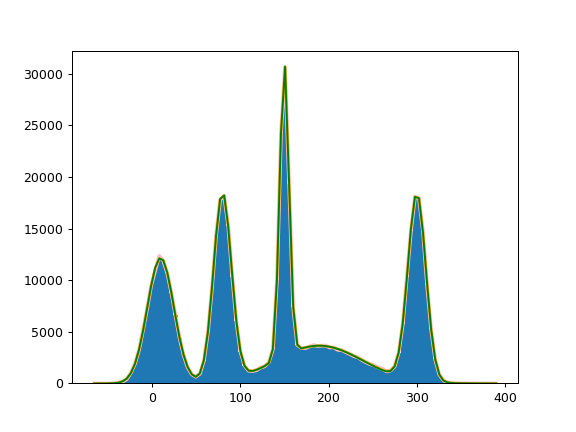

<ValueView x0=12165.51377753934 x1=9.929851192353592 x2=15.068739197038404 x3=18190.01598286201 x4=79.94623967744289 x5=10.08524490767733 x6=28333.46704135258 x7=149.97501857694218 x8=5.185740486096281 x9=3653.066882823028 x10=189.69031895447256 x11=49.94940219939203 x12=18164.42782781239 x13=300.03731056918764 x14=10.110977819704615>
vars: [12165.51377753934, 9.929851192353592, 15.068739197038404, 18190.01598286201, 79.94623967744289, 10.08524490767733, 28333.46704135258, 149.97501857694218, 5.185740486096281, 3653.066882823028, 189.69031895447256, 49.94940219939203, 18164.42782781239, 300.03731056918764, 10.110977819704615], amp_0: 12165.51377753934, mean_0: 9.929851192353592, sigma_0: 15.068739197038404, amp_1: 18190.01598286201, mean_1: 79.94623967744289, sigma_1: 10.08524490767733, amp_2: 28333.46704135258, mean_2: 149.97501857694218, sigma_2: 5.185740486096281, amp_3: 3653.066882823028, mean_3: 189.69031895447256, sigma_3: 49.94940219939203, amp_4: 18164.42782781239, mean_4: 300.

In [242]:
from scipy.interpolate import UnivariateSpline


mu, sig = 20,10
m2 = np.array(np.random.normal(10, 15, size = 100000))
m1 = np.array(np.random.normal(80, 10, size = 100000))
m3 = np.array(np.random.normal(300, 10, size = 100000))
m4 = np.array(np.random.normal(190, 50, size = 100000))
m5 = np.array(np.random.normal(150, 5, size = 80000))

yyt = np.concatenate((m2, m1,m3,m4, m5))
fig = plt.figure()

res = plt.hist(yyt, bins=100)
yy = res[0]
xx = (res[1][:-1]+res[1][1:])*0.5
plt.plot(xx,yy,c="pink",lw=3)


gauss_to_find = 5
f = Fitter("gaussian")
f.fit(xx,yy,n=gauss_to_find)
p = f.getParams()
print(f.par)
print(p)
plt.plot(xx,f.evaluate(xx), c="orange", lw=2, label="unbinned")

#fit finned
f = Fitter("gaussian")
f.fitBinned(yyt,bins=100,n=gauss_to_find)
p = f.getParams()
print("Chi2 = ",f.chi2/f.dof)
print(p)


plt.plot(xx,f.evaluate(xx), c="green", label="binned")

<IPython.core.display.Javascript object>


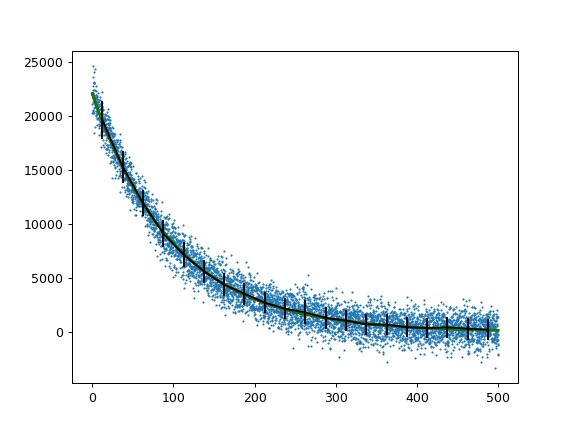

<ValueView p0=10.001784196145868 p1=-0.009911284735200046>
vars: [10.001784196145868, -0.009911284735200046], p0: 10.001784196145868, p1: -0.009911284735200046
vars: [10.001775168724707, -0.009874430641951528], p0: 10.001775168724707, p1: -0.009874430641951528


<ErrorbarContainer object of 3 artists>

In [6]:
p0, p1 = 10, -0.01
xx = np.arange(0,500,0.1)
yy = np.exp(p0+p1*xx) +np.random.normal(50, 1000, size = xx.shape)

fig = plt.figure()
plt.scatter(xx, yy,s=0.5)


f = Fitter("expo")
f.fit(xx,yy)
p = f.getParams()
print(f.par)
print(p)
plt.plot(xx, f.evaluate(xx),color="r",lw=2)



f = Fitter("expo")
f.fitBinned(xx,yy,bins=20)
p = f.getParams()
print(p)
plt.plot(xx, f.evaluate(xx),color="g",lw=2)
plt.errorbar(f.profx, f.profy, yerr=f.profyrr, c="black", label="Internal Profile")

/tmp/ipykernel_253/2172772997.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  pts = numpy_2d([0, 0], cov, size=10000)


<IPython.core.display.Javascript object>


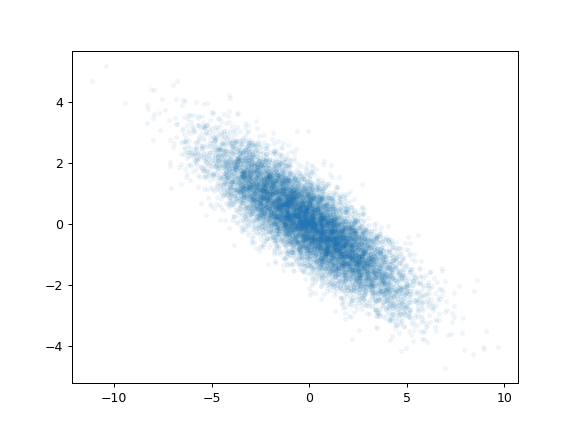

ValueError: not enough values to unpack (expected 6, got 5)

In [7]:
numpy_2d = np.random.multivariate_normal
f = Fitter("gaussian2d")

cov = np.array([[6, -3], [-3, 1]])  # to generate our testing dataset
pts = numpy_2d([0, 0], cov, size=10000)
x,y = pts[:, 0], pts[:, 1]

fig2 = plt.figure()
plt.plot(x,y, '.', alpha=0.05)


xb, yb, zb, _,_,_ = Utils.profile2d(x,y)

plt.scatter(xb, yb, c=zb,s=1, cmap="jet")

f.fit(x,y)
p = f.getParams()
print(f.par)
print(p)


xg, yg = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]
plt.contour(xg, yg, f.evaluate((xg, yg)))

In [ ]:
f = Fitter("gaussian2d")

numpy_2d = np.random.multivariate_normal  # to generate our testing dataset

cov = np.array([[6, -3], [-3, 3.5]])
cov1 = np.array([[6, -3], [-3, 15]])

pts =  np.concatenate((numpy_2d([0, 0], cov, size=10000)
                       ,numpy_2d([4, 4], cov1, size=10000)))
x,y = pts[:, 0], pts[:, 1]

f.fit(x,y,n=2)
p = f.getParams()
print(f.par)
print(p)
#print(p.sigma_y_1)

fig2 = plt.figure()
plt.plot(x,y, '.', alpha=0.5)


xg, yg = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]
plt.contour(xg, yg, f.evaluate((xg, yg)), levels=20)

In [ ]:
f = Fitter("gaussian2d")

numpy_2d = np.random.multivariate_normal # to generate our testing dataset

cov = np.array([[6, -3], [-3, 3.5]])
pts =  np.concatenate((numpy_2d([0, 0], cov, size=10000)
                       ,numpy_2d([2, 5], cov, size=10000)
                      ,numpy_2d([15, 5], cov, size=10000)))
x,y = pts[:, 0], pts[:, 1]

f.fit(x,y,n=3)
p = f.getParams()
print(f.par)
print(p)
print(p.sigma_x_2)
fig2 = plt.figure()
plt.plot(x,y, '.', alpha=0.5)

xg, yg = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]
plt.contour(xg, yg, f.evaluate((xg, yg)))

In [ ]:
f = Fitter("poly")

p0, p1, p2 = 10, -0.01,3
xx = np.arange(0,50,0.01)

print(xx.shape)
yy = p0*xx**2+p1*xx+p2+np.random.normal(10, 1000, size = xx.shape)

f.fit(xx,yy,p0=3)
p = f.getParams()
print(f.par)
print(p)
print(p.a)

fig2 = plt.figure()

plt.scatter(xx, yy,s=0.5)
plt.plot(xx, f.evaluate(xx),color="r",lw=2)

In [ ]:
f = Fitter("poly")

p0, p1, p2,p3 = 2, -1,-1,-2
xx = np.arange(-50,50,0.01)

print(xx.shape)
yy = p3*xx**3+p0*xx**2+p1*xx+p2+np.random.normal(100, 50000, size = xx.shape)

f.fit(xx,yy,p0=4)
p = f.getParams()
print(f.par)
print(p)
print(p.a)

fig2 = plt.figure()

plt.scatter(xx, yy,s=0.5)
plt.plot(xx, f.evaluate(xx),color="r",lw=2)